# Trabalho 1 - Redes
Criar um script usando Pytorch que utilize um Dataloader e uma Rede Neural.

A tarefa pode ser classificação ou regressão.

Gerar uma gráfico de treino e desenvolvimento.

## Imports
Primeiro é preciso importar as bibliotecas e funções a serem utilizadas.

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt

## Pegando os datasets
Utilizando o dataset CIFAR10 do torchvision, separa em treino e teste.

In [2]:
train = datasets.CIFAR10(
    root = "data",
    train = True,
    transform = ToTensor()
)

test = datasets.CIFAR10(
    root = "data",
    train = False,
    transform = ToTensor()
)

### Tranformando em DataLoader

In [3]:
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=True)

## Definindo o device
Como minha placa de vídeo é AMD não possuo Cuda.

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


## Definindo a Rede Neural
Criei uma classe que herda nn.Module e definir as camadas da rede aqui.

In [1]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

NameError: name 'nn' is not defined

### Jogando a Rede para a CPU

In [6]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
    (7): ReLU()
  )
)


### Definindo a loss function e o otimizador
Learning rate inicial de 0.001 pois é melhor começar com valores baixos.

In [1]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

NameError: name 'nn' is not defined

## Funções para implementar o treino e o teste
Realizam os ajustes de pesos das redes e calculam a perda e acurácia do algoritmo

In [8]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    loss_history = []
    batch_history = []

    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
            
            correct = (pred.argmax(1) == y).type(torch.float).sum().item()
            
            loss_history.append(loss)
            batch_history.append(current)
            
    return loss_history, batch_history

In [9]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
      for X, y in dataloader:
          pred = model(X)
          test_loss += loss_fn(pred, y).item()
          correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct   /= size  
    print(f"Test Error: \n Accuracy: {100*correct:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return test_loss, correct

## Definindo a quantidade de treinamentos

In [10]:
epochs = 10
loss_test_history = []
acc_history = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------------------------")
    loss_train_history, batch_history = train_loop(train_loader, model, loss_fn, optimizer)
    loss, accuracy = test_loop(test_loader, model, loss_fn)
    loss_test_history.append(loss)
    acc_history.append(accuracy)

Epoch 1
-----------------------------------
loss: 2.308281 [    0/50000]
loss: 2.290848 [ 6400/50000]
loss: 2.297440 [12800/50000]
loss: 2.271464 [19200/50000]
loss: 2.267399 [25600/50000]
loss: 2.255921 [32000/50000]
loss: 2.271636 [38400/50000]
loss: 2.244482 [44800/50000]
Test Error: 
 Accuracy: 22.4%, Avg loss: 0.035161 

Epoch 2
-----------------------------------
loss: 2.214947 [    0/50000]
loss: 2.252150 [ 6400/50000]
loss: 2.251891 [12800/50000]
loss: 2.170331 [19200/50000]
loss: 2.119503 [25600/50000]
loss: 1.981160 [32000/50000]
loss: 2.200391 [38400/50000]
loss: 2.106928 [44800/50000]
Test Error: 
 Accuracy: 25.8%, Avg loss: 0.032954 

Epoch 3
-----------------------------------
loss: 2.152361 [    0/50000]
loss: 2.177505 [ 6400/50000]
loss: 2.100954 [12800/50000]
loss: 2.077037 [19200/50000]
loss: 2.100823 [25600/50000]
loss: 2.001329 [32000/50000]
loss: 2.070193 [38400/50000]
loss: 1.916289 [44800/50000]
Test Error: 
 Accuracy: 30.0%, Avg loss: 0.031856 

Epoch 4
--------

## Resultados

### Gráfico de Desenvolvimento
Mostra como se comporta o loss durante o treinamento da rede neural em relação ao tamanho da batch. O gráfico plotado é um recorte da última época.

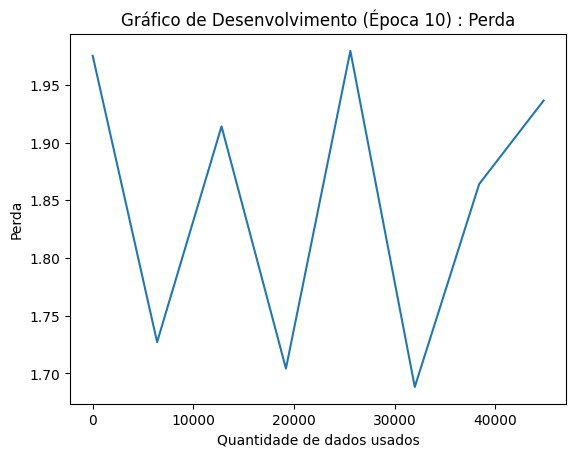

In [11]:
plt.title('Gráfico de Desenvolvimento (Época 10) : Perda')
plt.plot(batch_history, loss_train_history, label='loss')
plt.xlabel('Quantidade de dados usados')
plt.ylabel('Perda')
plt.show()

### Gráfico de Treino
Como foi o desempenho da rede durante o treino em relação ao avanço das épocas.

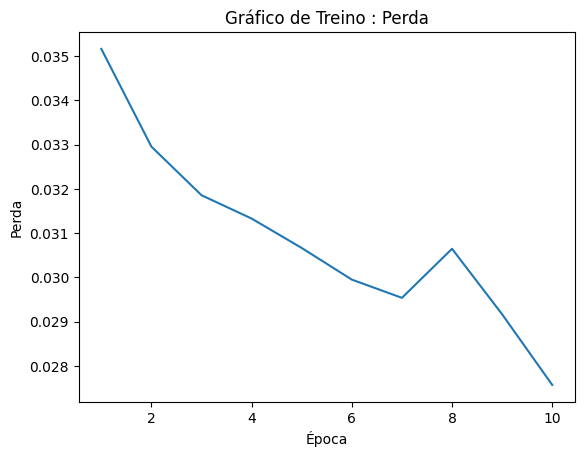

In [14]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.title('Gráfico de Treino : Perda')
plt.plot(epoch, loss_test_history, label='loss')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

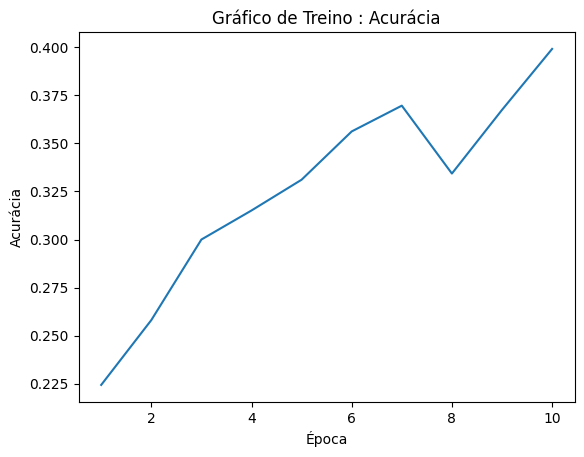

In [15]:
plt.title('Gráfico de Treino : Acurácia')
plt.plot(epoch, acc_history, label='accuracy')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.show()